In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/dating.csv'
data = pd.read_csv(file_url)

In [4]:
pd.options.display.max_columns=40
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   has_null                       8378 non-null   int64  
 1   gender                         8378 non-null   object 
 2   age                            8283 non-null   float64
 3   age_o                          8274 non-null   float64
 4   race                           8315 non-null   object 
 5   race_o                         8305 non-null   object 
 6   importance_same_race           8299 non-null   float64
 7   importance_same_religion       8299 non-null   float64
 8   pref_o_attractive              8289 non-null   float64
 9   pref_o_sincere                 8289 non-null   float64
 10  pref_o_intelligence            8289 non-null   float64
 11  pref_o_funny                   8280 non-null   float64
 12  pref_o_ambitious               8271 non-null   f

In [5]:
round(data.describe(),2)

,has_null,age,age_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sincere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,like,guess_prob_liked,met,match
count,8378.00,8283.00,8274.00,8299.00,8299.00,8289.00,8289.00,8289.00,8280.00,8271.00,8249.00,8166.00,8091.00,8072.00,8018.00,7656.00,7302.00,8299.00,8299.00,8299.00,8289.00,8279.00,8257.00,8176.00,8101.00,8082.00,8028.00,7666.00,7311.00,8220.00,8277.00,1800.00,8138.00,8069.00,8003.00,8378.00
mean,0.87,26.36,26.36,3.78,3.65,22.50,17.40,20.27,17.46,10.69,11.85,6.19,7.18,7.37,6.40,6.78,5.47,22.51,17.40,20.27,17.46,10.68,11.85,6.19,7.18,7.37,6.40,6.78,5.47,0.20,5.53,5.57,6.13,5.21,0.05,0.16
std,0.33,3.57,3.56,2.85,2.81,12.57,7.04,6.78,6.09,6.13,6.36,1.95,1.74,1.55,1.95,1.79,2.16,12.59,7.05,6.78,6.09,6.12,6.36,1.95,1.74,1.55,1.95,1.79,2.16,0.30,1.73,4.76,1.84,2.13,0.28,0.37
min,0.00,18.00,18.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.83,1.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,24.00,24.00,1.00,1.00,15.00,15.00,17.39,15.00,5.00,9.52,5.00,6.00,6.00,5.00,6.00,4.00,15.00,15.00,17.39,15.00,5.00,9.52,5.00,6.00,6.00,5.00,6.00,4.00,-0.02,5.00,2.00,5.00,4.00,0.00,0.00
50%,1.00,26.00,26.00,3.00,3.00,20.00,18.37,20.00,18.00,10.00,10.64,6.00,7.00,7.00,7.00,7.00,6.00,20.00,18.18,20.00,18.00,10.00,10.64,6.00,7.00,7.00,7.00,7.00,6.00,0.21,6.00,4.00,6.00,5.00,0.00,0.00
75%,1.00,28.00,28.00,6.00,6.00,25.00,20.00,23.81,20.00,15.00,16.00,8.00,8.00,8.00,8.00,8.00,7.00,25.00,20.00,23.81,20.00,15.00,16.00,8.00,8.00,8.00,8.00,8.00,7.00,0.43,7.00,8.00,7.00,7.00,0.00,0.00
max,1.00,55.00,55.00,10.00,10.00,100.00,60.00,50.00,50.00,53.00,30.00,10.50,10.00,10.00,11.00,10.00,10.00,100.00,60.00,50.00,50.00,53.00,30.00,10.00,10.00,10.00,10.00,10.00,10.00,0.91,10.00,20.00,10.00,10.00,8.00,1.00


In [6]:
data.isna().mean()

has_null                         0.000000
gender                           0.000000
age                              0.011339
age_o                            0.012413
race                             0.007520
race_o                           0.008713
importance_same_race             0.009429
importance_same_religion         0.009429
pref_o_attractive                0.010623
pref_o_sincere                   0.010623
pref_o_intelligence              0.010623
pref_o_funny                     0.011697
pref_o_ambitious                 0.012772
pref_o_shared_interests          0.015397
attractive_o                     0.025304
sincere_o                        0.034256
intelligence_o                   0.036524
funny_o                          0.042970
ambitous_o                       0.086178
shared_interests_o               0.128432
attractive_important             0.009429
sincere_important                0.009429
intellicence_important           0.009429
funny_important                  0

In [7]:
data = data.dropna(subset=['pref_o_attractive', 'pref_o_sincere', 
                           'pref_o_intelligence', 'pref_o_funny', 
                           'pref_o_ambitious', 'pref_o_shared_interests',
                           'attractive_important', 'sincere_important', 
                           'intellicence_important', 'funny_important', 
                           'ambtition_important', 'shared_interests_important'])
data=data.fillna(-99) 

In [20]:
def age_gap(x):
    if x['age'] ==-99:
        return-99
    elif x['age_o'] ==-99:
        return -99
    elif x['gender'] == 'female':
        return x['age_o'] - x['age']
    else:
        return x['age'] - x['age_o']
    
    
data['age_gap']=data.apply(age_gap, axis=1)
data['age_gap_abs']=abs(data['age_gap'])

In [21]:
def same_race(x):
    if x['race'] ==-99:
        return-99
    elif x['race_o'] ==-99:
        return -99
    elif x['race'] ==x['race_o']:
        return 1
    else:
        return -1
    
    
data['same_race']=data.apply(same_race, axis=1)

In [22]:
def same_race_point(x): 
    if x['same_race'] == -99:
         return -99 
    else: 
        return x['same_race'] * x['importance_same_race'] 
data['same_race_point']=data.apply(same_race_point, axis=1)

In [23]:
def rating(data, importance, score): 
    if data[importance] == -99:
        return -99 
    elif data[score] == -99: 
        return -99
    else:
        return data[importance] * data[score]

In [24]:
partner_imp = data.columns[8:14] 
partner_rate_me = data.columns[14:20] 
my_imp = data.columns[20:26]
my_rate_partner = data.columns[26:32] 

new_label_partner = ['attractive_p', 'sincere_partner_p', 'intelligence_p',
'funny_p', 'ambition_p', 'shared_interests_p']

new_label_me = ['attractive_m', 'sincere_partner_m', 'intelligence_m', 'funny_m', 'ambition_m', 'shared_interests_m']

In [25]:
for i,j,k in zip(new_label_partner, partner_imp, partner_rate_me): 
    data[i] = data.apply(lambda x: rating(x, j, k), axis=1) 
for i,j,k in zip(new_label_me, my_imp, my_rate_partner): 
    data[i] = data.apply(lambda x: rating(x, j, k), axis=1) 

In [26]:
data = pd.get_dummies(data, columns=['gender','race','race_o'], drop_first=True) 


In [27]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(data.drop('match',axis=1),
data['match'], test_size=0.2)

In [30]:
import xgboost as xgb
model=xgb.XGBClassifier(n_estimators =500, max_depth =5)

In [31]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [32]:
pred = model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test, pred)

0.8653136531365314

In [33]:
print(confusion_matrix(y_test, pred))

[[1281   61]
 [ 158  126]]


In [34]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1342
           1       0.67      0.44      0.54       284

    accuracy                           0.87      1626
   macro avg       0.78      0.70      0.73      1626
weighted avg       0.85      0.87      0.85      1626



In [35]:
max_depth = [3, 5, 10]
learaning_rate = [0.01, 0.05, 0.1]

In [36]:
from sklearn.model_selection import GridSearchCV 

In [37]:
parameters = {
 'learning_rate': [0.01, 0.1, 0.3],
 'max_depth': [5, 7, 10],
 'subsample': [0.5, 0.7, 1],
 'n_estimators': [300, 500, 1000]
 }

In [38]:
model = xgb.XGBClassifier( ) 

In [39]:
gs_model = GridSearchCV(model, parameters, n_jobs=-1, scoring='f1', cv = 5)
gs_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [5, 7, 10],
                         'n_estimators': [300, 500, 1000],
                         'subsample': [0.5, 0.7, 1]},
             scoring='f1')

In [41]:
gs_model.best_params_

{'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 1000, 'subsample': 0.7}

In [42]:
pred = gs_model.predict(X_test) 
accuracy_score(y_test, pred)

0.8554735547355473

In [43]:
model = xgb.XGBClassifier(learning_rate = 0.3, max_depth = 7,
 n_estimators = 1000, subsample = 0.7) # 모델 객체 생성
model.fit(X_train, y_train) 
model.feature_importances_

array([0.01522872, 0.00971602, 0.00912369, 0.01176708, 0.0114361 ,
       0.0132712 , 0.01001261, 0.01078224, 0.00749317, 0.01241457,
       0.0113774 , 0.06076432, 0.015562  , 0.01239921, 0.03531988,
       0.00993942, 0.01900353, 0.01220879, 0.01245519, 0.01763933,
       0.00871192, 0.01016051, 0.01252428, 0.02664259, 0.01250024,
       0.01160651, 0.03186065, 0.01269281, 0.01334013, 0.00959207,
       0.01125499, 0.01676218, 0.08540428, 0.0215427 , 0.03801276,
       0.01225611, 0.01061599, 0.00763604, 0.01501599, 0.01128568,
       0.01124108, 0.0120945 , 0.01262755, 0.01109542, 0.01032816,
       0.01230004, 0.00984018, 0.01160632, 0.01182973, 0.01014965,
       0.01178934, 0.0161732 , 0.00962707, 0.01194385, 0.01667763,
       0.04579805, 0.01406734, 0.01000118, 0.02352004, 0.02995682],
      dtype=float32)

<Axes: xlabel='values', ylabel='features'>

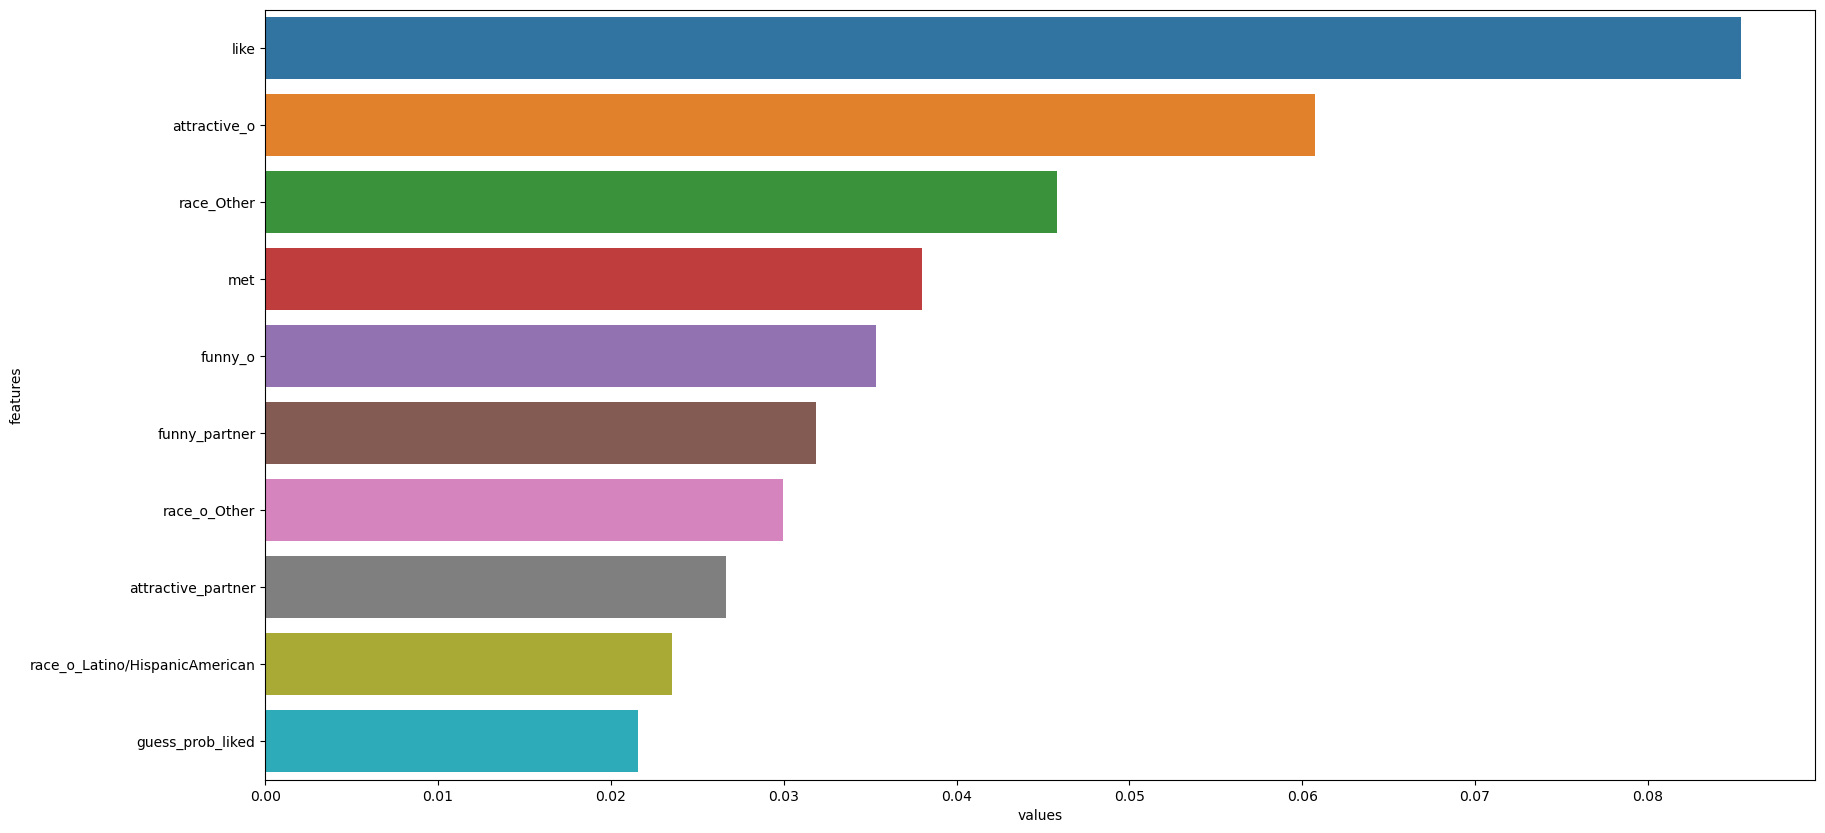

In [44]:
feature_imp = pd.DataFrame({'features': X_train.columns, 'values': model.
feature_importances_})
plt.figure(figsize=(20, 10)) 
sns.barplot(x='values', y='features', 
data=feature_imp.sort_values(by='values', ascending=False).head(10))